In [1]:
# Import libraries
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import warnings
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')

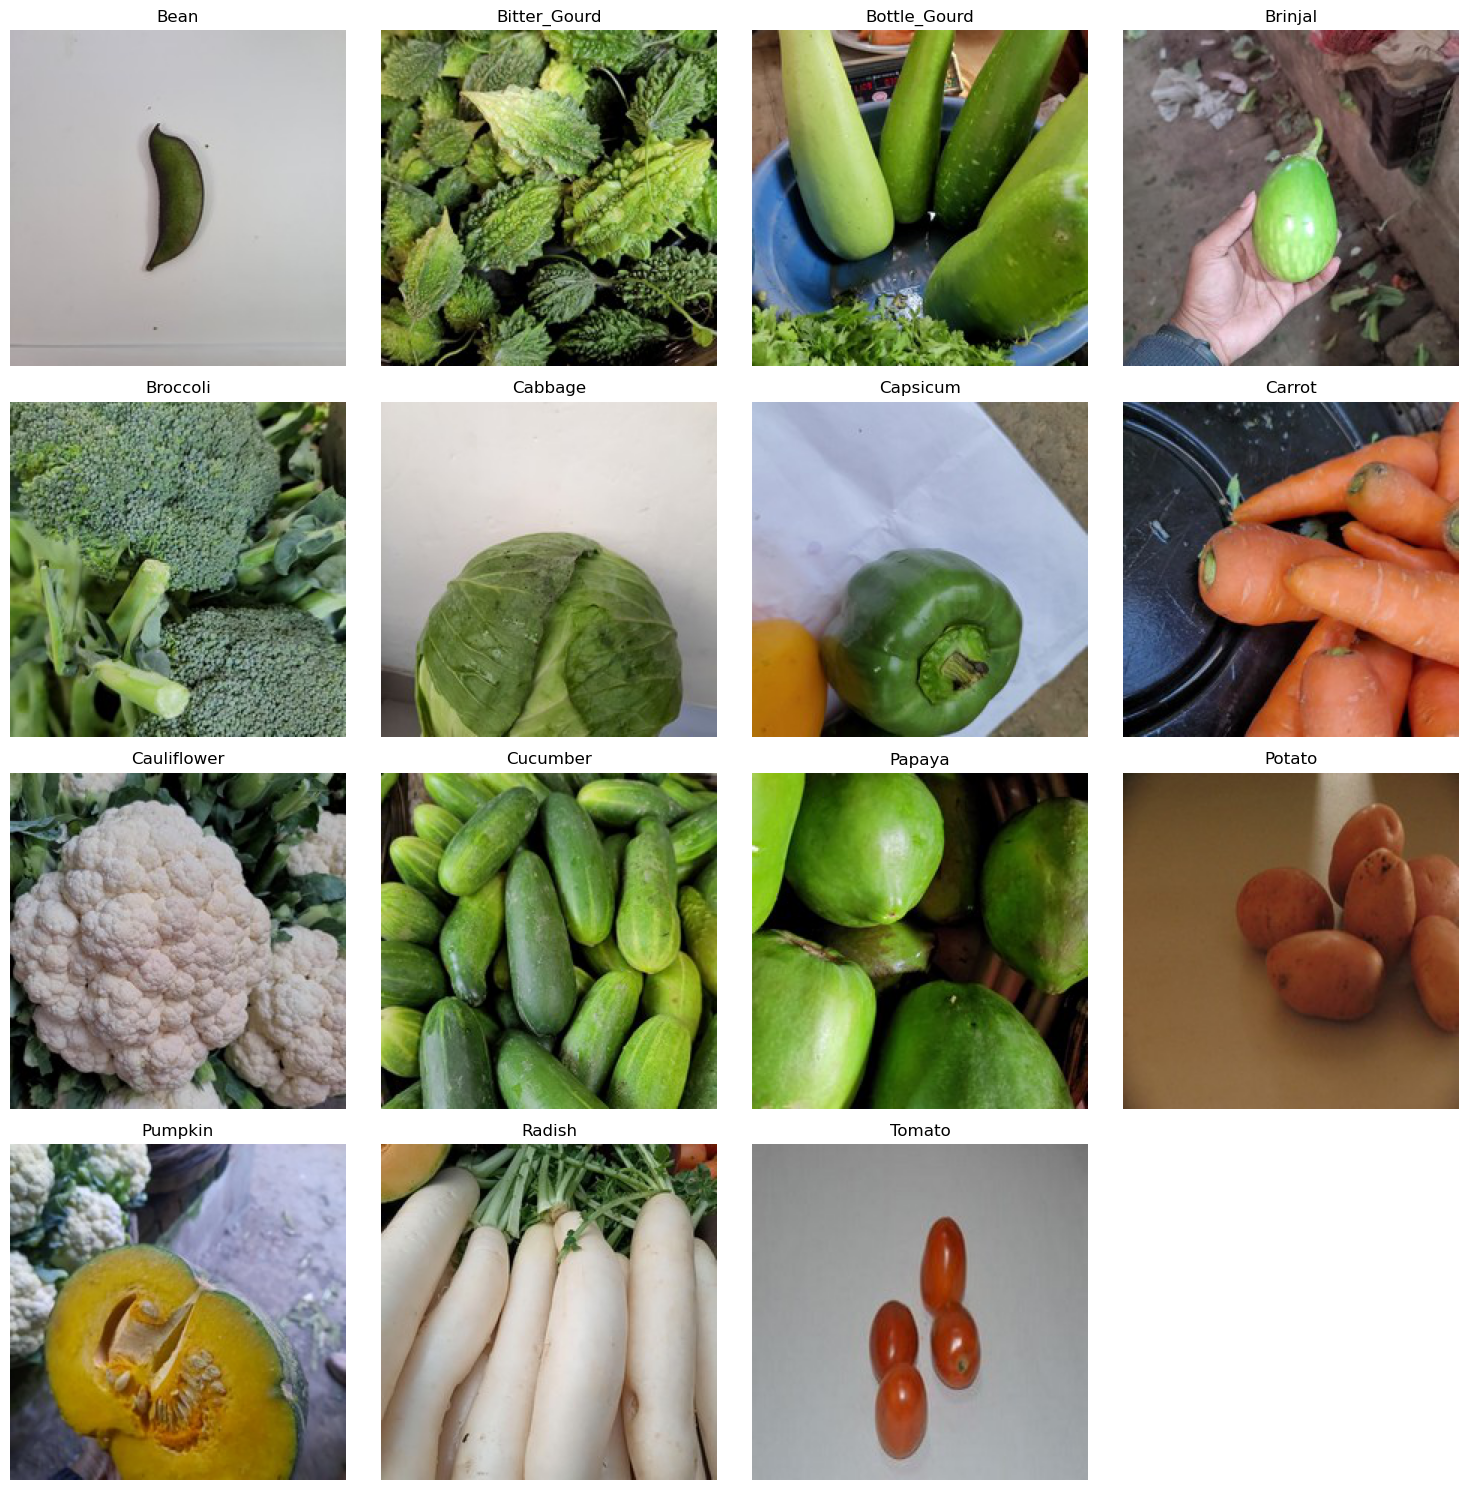

In [2]:
# Define paths using raw strings and consistent slashes
train_path = r"Vegetable Images/train"
validation_path = r"Vegetable Images/validation"
test_path = r"Vegetable Images/test"

# Get list of categories
image_categories = os.listdir(train_path)

def plot_images(image_categories):
    num_categories = len(image_categories)
    rows = int(num_categories**0.5) + 1  # Dynamic grid calculation
    cols = min(num_categories, 4)
    
    plt.figure(figsize=(15, 15))
    for i, cat in enumerate(image_categories):
        # Create full path using os.path.join
        category_path = os.path.join(train_path, cat)
        
        if not os.path.isdir(category_path):
            continue
            
        images = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        if not images:
            continue
            
        # Plot first image from category
        img_path = os.path.join(category_path, images[0])
        try:
            img = image.load_img(img_path, target_size=(224, 224))
            plt.subplot(rows, cols, i+1)
            plt.imshow(img)
            plt.title(cat)
            plt.axis('off')
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_images(image_categories)

In [3]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [4]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [5]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,214,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,252,815 (42.93 MB)

 Trainable params: 11,252,815 (42.93 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile and fit the model
from tensorflow import keras

early_stopping = keras.callbacks.EarlyStopping(patience=5)
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])  # <-- Wrap in list

hist = model.fit(train_image_generator, 
                 epochs=3, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch=15000//32, 
                 validation_steps=3000//32, 
                 callbacks=early_stopping)

Epoch 1/3
211/468 ━━━━━━━━━━━━━━━━━━━━ 2:10 509ms/step - accuracy: 0.2330 - loss: 2.3141

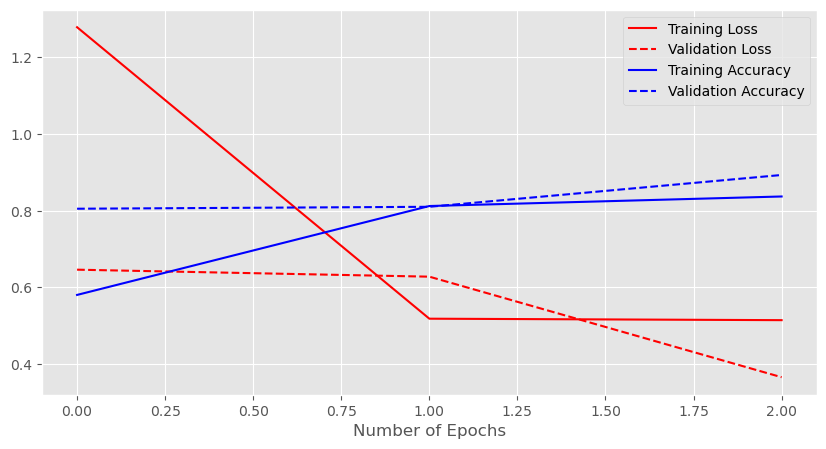

In [ ]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [ ]:
# Predict the accuracy for the test set
model.evaluate(test_image_generator)

94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.8939 - loss: 0.3551


[0.3610689640045166, 0.8926666378974915]

94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step


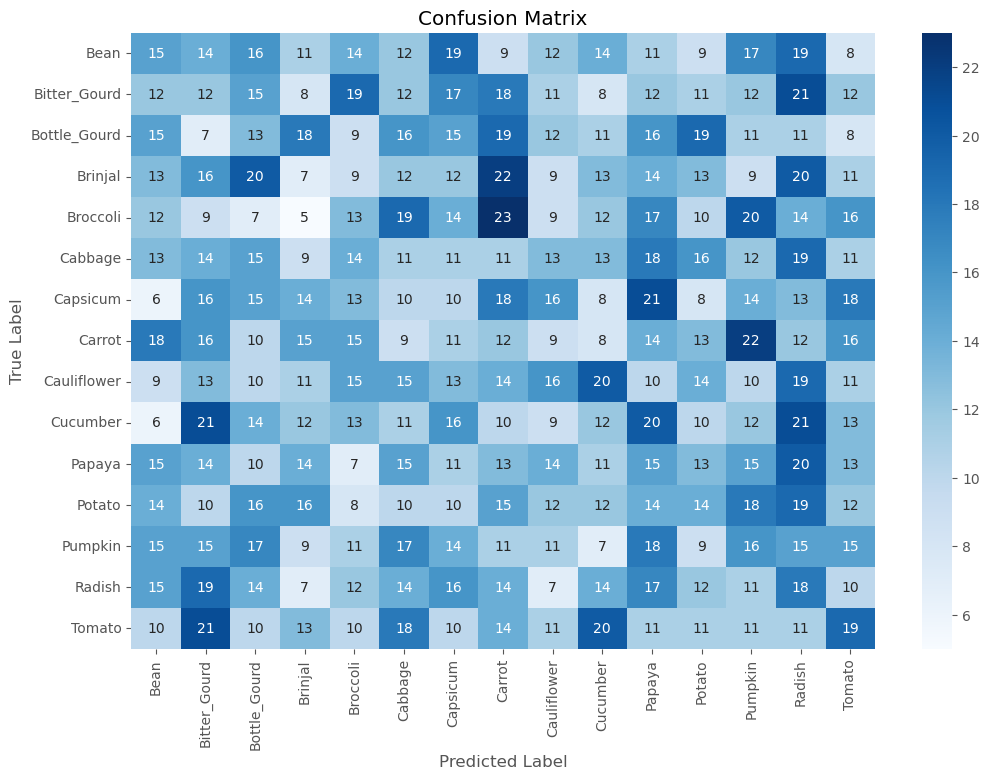

In [ ]:
# Generate predictions on the test set
y_true = test_image_generator.classes  # True labels
y_pred = np.argmax(model.predict(test_image_generator), axis=1)  # Predicted labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_map.values(), yticklabels=class_map.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


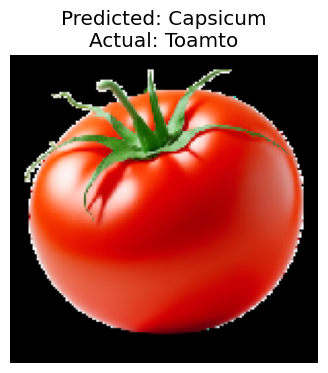

In [ ]:
# Testing the Model
def generate_predictions(test_image_path, actual_label):
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, *test_img_arr.shape))
    
    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title(f"Predicted: {predicted_vegetable}\nActual: {actual_label}")
    plt.axis('off')
    plt.show()

test_image_path = "./tomato eg.png"
# Call the function with verified path and correct label
generate_predictions(test_image_path, actual_label='Toamto')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


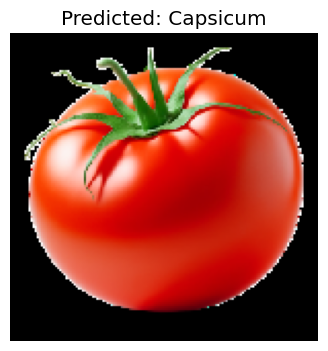

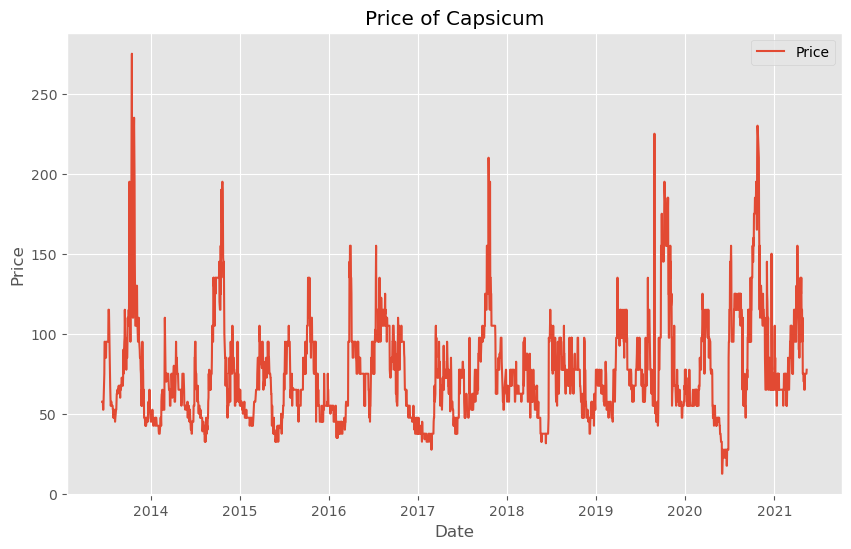

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.2092 - mae: 0.1576 - val_loss: 0.7783 - val_mae: 0.0684
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6745 - mae: 0.0639 - val_loss: 0.4196 - val_mae: 0.0674
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3597 - mae: 0.0577 - val_loss: 0.2182 - val_mae: 0.0666
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1851 - mae: 0.0553 - val_loss: 0.1098 - val_mae: 0.0637
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0926 - mae: 0.0547 - val_loss: 0.0544 - val_mae: 0.0609
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0453 - mae: 0.0508 - val_loss: 0.0272 - val_mae: 0.0600
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0221 - mae: 0.0481 - val_loss: 0.0143 - val_mae: 0.0588
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mae: 0.0470 - val_loss: 0.0088 - val_mae: 0.0586
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.00

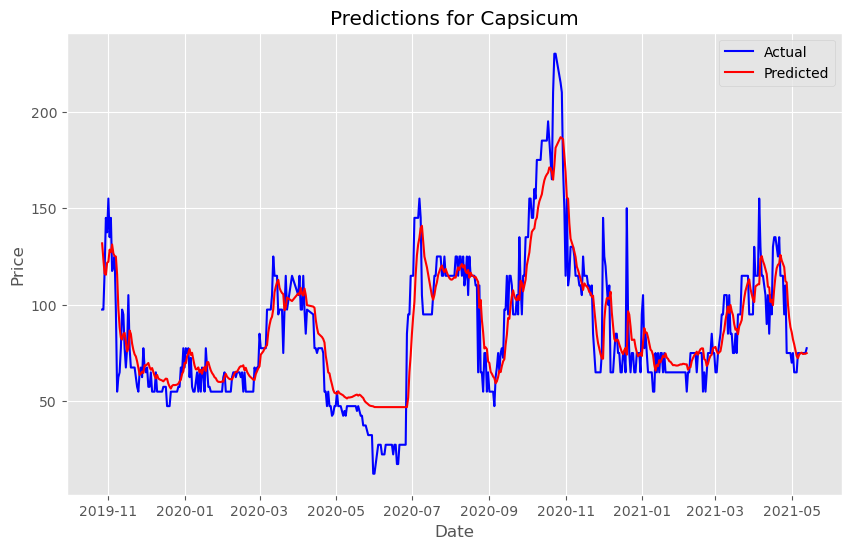

In [ ]:
# Load Vegetable Recognition Model (Assumes model is already loaded)
def generate_predictions(test_image_path):
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img) / 255.0
    test_img_input = test_img_arr.reshape((1, *test_img_arr.shape))
    
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title(f"Predicted: {predicted_vegetable}")
    plt.axis('off')
    plt.show()
    
    return predicted_vegetable

# Path to test image
test_image_path = "./tomato eg.png"
predicted_vegetable = generate_predictions(test_image_path)

In [ ]:
# Load price dataset
df = pd.read_csv("vegetable_prices.csv", parse_dates=["Date"], index_col=["Date"])

# Filter data for predicted vegetable
df_selected = df[df['Commodity'] == predicted_vegetable].drop(['Commodity'], axis=1).dropna()
if df_selected.empty:
    print(f"No data available for {predicted_vegetable}. Exiting.")
    exit()

In [ ]:
# Plot price trend
plt.figure(figsize=(10, 6))
plt.plot(df_selected.index, df_selected['Average'], label='Price')
plt.title(f"Price of {predicted_vegetable}")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Normalize series
series = df_selected['Average'].to_numpy()
min_val, max_val = np.min(series), np.max(series)
series_normalized = (series - min_val) / (max_val - min_val)

In [ ]:
# Split data
split_time = int(len(series_normalized) * 0.8)
x_train_norm, x_valid_norm = series_normalized[:split_time], series_normalized[split_time:]

# Adjust window size
window_size = min(30, len(x_train_norm) - 1) if len(x_train_norm) < 31 else 30

# Prepare dataset
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda w: w.batch(window_size + 1))
    dataset = dataset.map(lambda w: (w[:-1], w[-1]))
    dataset = dataset.shuffle(shuffle_buffer).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

batch_size = 64
shuffle_buffer_size = 1000
train_dataset = windowed_dataset(x_train_norm, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset(x_valid_norm, window_size, batch_size, shuffle_buffer_size)

In [ ]:
# Define prediction model
price_model = Sequential([
    Dense(128, activation='relu', input_shape=[window_size], kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3, decay_steps=1000, decay_rate=0.96
)
early_stopping = EarlyStopping(patience=15, restore_best_weights=True)
price_model.compile(loss=Huber(delta=0.5), optimizer=Adam(learning_rate=lr_schedule), metrics=['mae'])

# Train model
history = price_model.fit(train_dataset, validation_data=val_dataset, epochs=200, callbacks=[early_stopping])

In [ ]:
# Forecast prices
def model_forecast(model, series, window_size, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    dataset = dataset.batch(batch_size).prefetch(1)
    forecast = model.predict(dataset)
    return forecast

forecast_series = series_normalized[split_time - window_size:]
forecast = model_forecast(price_model, forecast_series, window_size, batch_size)
results = forecast.squeeze() * (max_val - min_val) + min_val

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(df_selected.index[split_time:], x_valid_norm * (max_val - min_val) + min_val, label='Actual', color='blue')
plt.plot(df_selected.index[split_time:], results[:len(x_valid_norm)], label='Predicted', color='red')
plt.title(f"Predictions for {predicted_vegetable}")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()